# Linear Regression - part 2

## Seoul Artificial Intelligence Meetup

Martin Kersner, <m.kersner@gmail.com>

2017/11/11

In [1]:
import math
import numpy as np
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

## Ordinary Least Squares

### Fit
$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

### Predict
$\hat{y} = X\hat{\beta}$

### Assumption
$m$ > $n$

In [2]:
# Inspired by book Machine Learning in Action, Peter Harrington
class OrdinaryLeastSquares(object):
    def __init__(self):
        self.β̂  = None

    def fit(self, X, y):
        XtX = X.T*X

        # matrix must be non-singular
        assert(np.linalg.det(XtX) != 0.0)

        self.β̂  = XtX.I*X.T*y
    
    def predict(self, X):
        return X*self.β̂ 

## Dataset

$y = x^2$

In [3]:
X_orig = np.matrix([-3, -2, -1, 0, 1, 2, 3]).T
y = np.matrix([9, 4, 1, 0, 1, 4, 9]).T

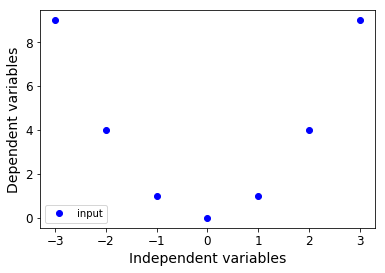

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_orig, y, color='b', linestyle="", marker="o", label="input")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

## Ordinary Least Squares

In [5]:
# Preprocess data
X = np.c_[np.ones(X_orig.shape[0]), X_orig]

# Fit and Predict
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

### Display line fitted with Ordinary Least Squares

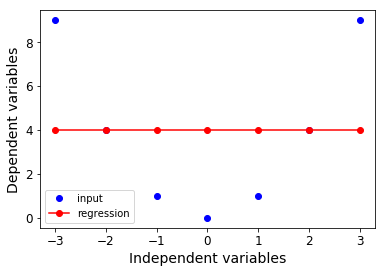

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, color='b', linestyle="", marker="o", label="input")
ax.plot(X[:,1], ŷ, marker='o', linestyle='-', color='r', label="regression")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

### Evaluation of Ordinary Least Squares

#### Correlation

In [7]:
np.corrcoef(y.T, ŷ.T)

/Users/martin/git/regression-meetup/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/martin/git/regression-meetup/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[  1.,  nan],
       [ nan,  nan]])

#### R2

In [8]:
r2_score(y, ŷ)

0.0

## Polynomial Regression

### Fit
$\hat{\beta} = (\phi(X)^{T}\phi(X))^{-1}\phi(X)^{T}y$

### Predict
$\hat{y} = \phi(X)\hat{\beta}$

### Assumption
$m$ > $n$

In [9]:
import itertools

def polynomial(X, degree=2, bias=True):
    m = X.shape[1]
    indexes = []

    # generate indexes for accessing correct features
    for d in range(degree):
        for idx in itertools.combinations_with_replacement(list(range(m)), d+1):
            indexes.append(idx)

    def apply_polynomial(X_row, indexes):
        return [np.prod(X_row[0, idx]) for idx in indexes]
    
    X_pol = np.apply_along_axis(apply_polynomial, 1, X, indexes)
    
    if bias:
        X_pol = np.c_[np.ones(X_pol.shape[0]), X_pol]
        
    return np.matrix(X_pol)

### Degree 2

In [10]:
# Preprocess data
X = polynomial(X_orig, degree=2)

# Fit and predict
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ2 = ols.predict(X)

print(ols.β̂)

[[  0.00000000e+00]
 [  4.16333634e-17]
 [  1.00000000e+00]]


### Degree 3

In [11]:
# Preprocess data
X = polynomial(X_orig, degree=3)

# Fit and predict
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ3 = ols.predict(X)

print(ols.β̂)

[[  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]
 [ -1.38777878e-17]]


### Display line fitted with polynomial regression of degree 2

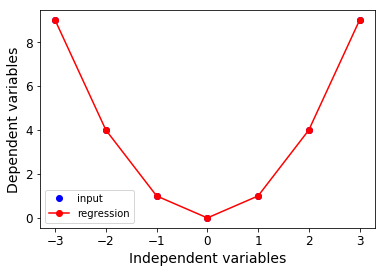

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y, color='b', linestyle="", marker="o", label="input")
ax.plot(X[:,1], ŷ2, marker='o', linestyle='-', color='r', label="regression")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

### Evaluation of Polynomial Regression of degree 2

#### Correlation

In [13]:
np.corrcoef(y.T, ŷ2.T)

array([[ 1.,  1.],
       [ 1.,  1.]])

#### R2

In [14]:
r2_score(y, ŷ2)

1.0

## Underfiting & Overfitting

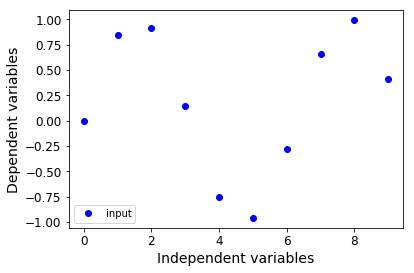

In [15]:
m = 10
X_orig = np.matrix(range(m)).T
y = np.matrix([math.sin(x) for x in range(m)]).T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_orig, y, color='b', linestyle="", marker="o", label="input")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

In [16]:
def plot_predictions(X_col, y, ŷ):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(X_col, y, color='b', linestyle="", marker="o", label="input")
    ax.plot(X_col, ŷ, marker='o', linestyle='-', color='r', label="regression")
    plt.ylabel('Dependent variables')
    plt.xlabel('Independent variables')
    plt.legend()

### Underfitting

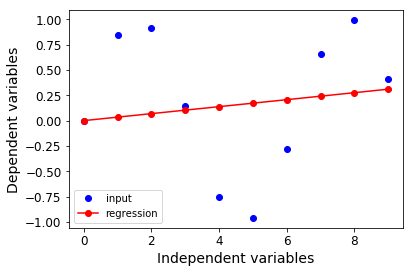

In [17]:
X = X_orig
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

plot_predictions(X_orig[:,0], y, ŷ)

### Well fitted?

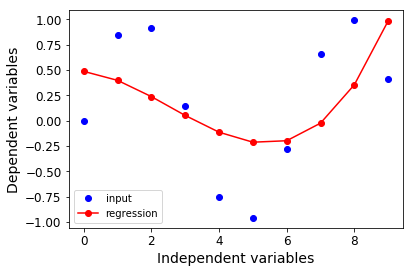

In [18]:
X = polynomial(X_orig, degree=3)
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

plot_predictions(X[:,1], y, ŷ)

### Overfitting?

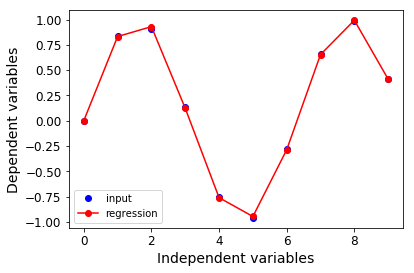

In [19]:
X = polynomial(X_orig, degree=6)
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

plot_predictions(X[:,1], y, ŷ)

## Wages Dataset

In [20]:
import urllib.request
from pathlib import Path
import os

In [21]:
# Get dataset
wages_dataset = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ISLR/Wage.csv"
wages_dataset_path = Path("datasets/Wage.csv")
if not Path(wages_dataset_path).exists():
    os.makedirs(wages_dataset_path.parent)
    urllib.request.urlretrieve(wages_dataset, wages_dataset_path)

In [22]:
df = pd.read_csv(wages_dataset_path)
df_age_wage = df[["age", "wage"]]

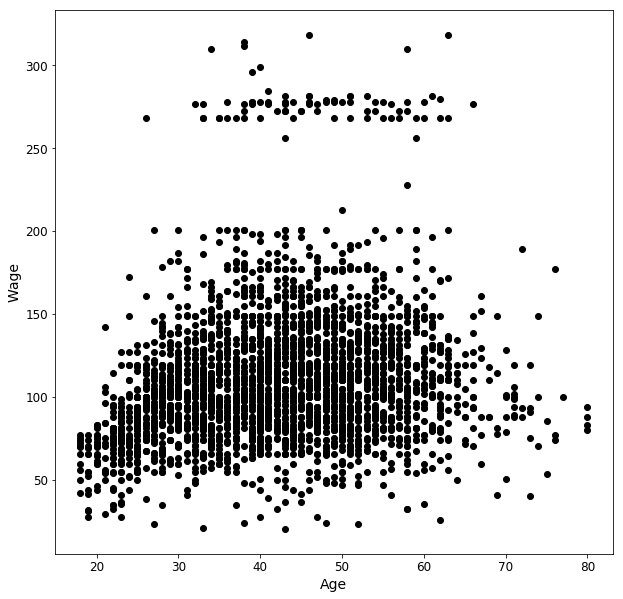

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(df_age_wage["age"], df_age_wage["wage"], color='k', linestyle="", marker="o")
plt.ylabel('Wage')
plt.xlabel('Age')
plt.show()

In [24]:
y = np.matrix(df_age_wage["wage"]).T
X = np.matrix(df_age_wage["age"]).T

In [25]:
X = polynomial(X, degree=4)

In [26]:
ols = OrdinaryLeastSquares()
ols.fit(X, y)
ŷ = ols.predict(X)

### 95% Confidence Interval

http://www.wright.edu/~thaddeus.tarpey/STT363chapter5.pdf

In [27]:
X_col = X[:,1]
srt_idx = np.argsort(np.squeeze(np.asarray(X_col.T)))
X_sort = X[srt_idx]

cov_beta = np.sum(np.square(y[srt_idx]-ŷ[srt_idx]))/(X_sort.shape[0]-2)*(X_sort.T*X_sort).I
var_beta = X_sort*cov_beta*X_sort.T
var_pred = var_beta[np.diag_indices_from(var_beta)].T
pointwise_standard_error = np.sqrt(var_pred)
var_up = ŷ[srt_idx] + 2*pointwise_standard_error
var_down = ŷ[srt_idx] - 2*pointwise_standard_error

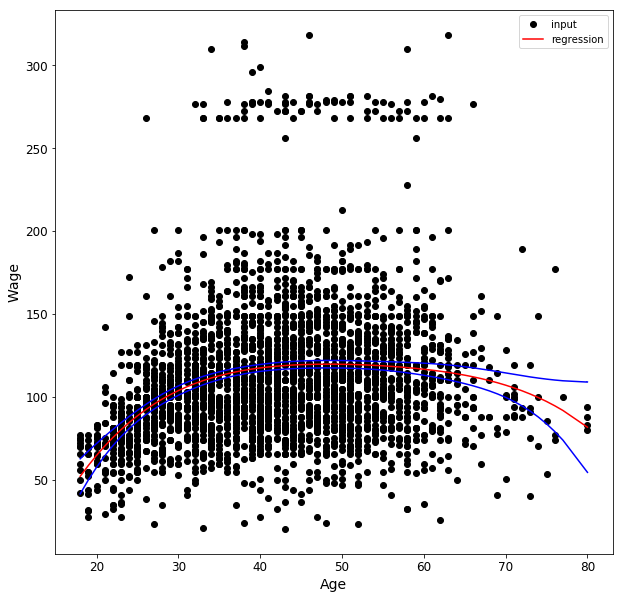

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(X_col, y, color='k', linestyle="", marker="o", label="input")
ax.plot(X_col[srt_idx], var_down, color='b', linestyle="-")
ax.plot(X_col[srt_idx], var_up, color='b', linestyle="-")
ax.plot(X_col[srt_idx], ŷ[srt_idx], linestyle='-', color='r', label="regression")
plt.ylabel('Wage')
plt.xlabel('Age')
plt.legend()